In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.628571,5317.89,6.36,107.25,151.939714,8,3.960370,34,4.137478,3.186426
13047,1355,105,309,3,84.687500,3089.10,6.64,68.00,193.068750,23,3.926082,9,5.420969,3.875000
12583,4978,114,714,100,292.823529,6629.34,6.80,132.80,389.961176,3,2.140474,15,5.803909,4.087463
13748,439,24,208,8,87.800000,948.25,9.36,204.00,189.650000,0,3.996429,5,4.080050,2.321928
15100,58,1,32,16,9.666667,635.10,175.20,350.40,105.850000,3,10.950000,3,2.251629,2.251629


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TProd           4333 non-null   int64  
 1   DProd           4333 non-null   int64  
 2   MaxPO           4333 non-null   int64  
 3   MinPO           4333 non-null   int64  
 4   MeanProdOrder   4333 non-null   float64
 5   TSale           4333 non-null   float64
 6   MinPSale        4333 non-null   float64
 7   MaxPSale        4333 non-null   float64
 8   MeanSaleOrder   4333 non-null   float64
 9   TRProd          4333 non-null   int64  
 10  MeanPSale       4333 non-null   float64
 11  TOrder          4333 non-null   int64  
 12  SETSaleQta      4333 non-null   float64
 13  SESaleQtaOrder  4333 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 507.8 KB


In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [5]:
X[:2]

array([[8.65910987e-03, 1.12044818e-02, 9.30356194e-03, 1.40611019e-03,
        6.21530821e-03, 1.90898484e-02, 1.63172699e-03, 2.70989149e-03,
        1.53398922e-02, 3.77358491e-02, 8.83228419e-03, 1.60975610e-01,
        5.14826537e-01, 4.04447643e-01],
       [6.89370968e-03, 5.82633053e-02, 2.04678363e-02, 2.55656398e-04,
        1.08240670e-02, 1.10890693e-02, 1.70424819e-03, 1.70266383e-03,
        1.94922955e-02, 1.08490566e-01, 8.75337435e-03, 3.90243902e-02,
        6.74531264e-01, 4.91847191e-01]])

In [6]:
def count_cluster_elements(data, threshold, criterion='distance'):
    count = {}
    clusters = fcluster(data, threshold, criterion)
    for c in clusters:
        count[c] = count[c]+1 if c in count else 1
    return count, clusters

In [7]:
methods_silhouette = {}

In [8]:
# Complete - Euclidean

Text(0.5, 1.0, 'Complete - Euclidean')

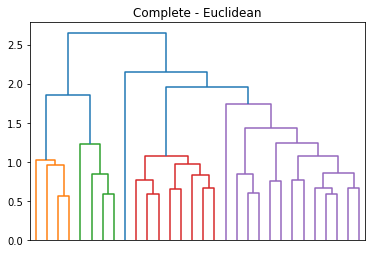

In [9]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
threshold_value = 1.85
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Complete - Euclidean")

In [10]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 5
[2882, 1441, 5, 4, 1]


In [11]:
score = silhouette_score(X, clusters)
methods_silhouette["complete"] = round(score, 2)
score

0.4011972344772239

In [12]:
# Single - Euclidean

Text(0.5, 1.0, 'Single - Euclidean')

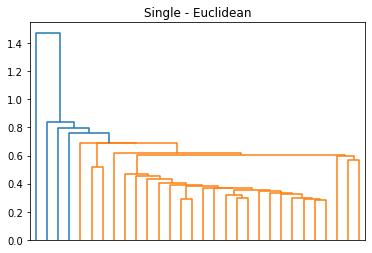

In [13]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
threshold_value = 0.7
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Single - Euclidean")

In [14]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 5
[4329, 1, 1, 1, 1]


In [15]:
score = silhouette_score(X, clusters)
methods_silhouette["single"] = round(score, 2)
score

0.7973799465176711

In [16]:
# Avereage - Euclidean

Text(0.5, 1.0, 'Average - Euclidean')

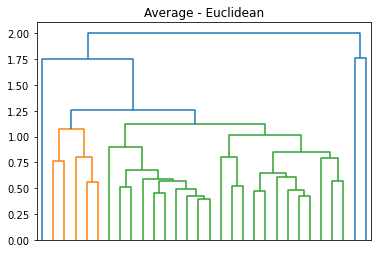

In [17]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
threshold_value = 1.25
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Average - Euclidean")

In [18]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 5
[4324, 6, 1, 1, 1]


In [19]:
score = silhouette_score(X, clusters)
methods_silhouette["average"] = round(score, 2)
score

0.7502529824079992

In [20]:
# Ward - Euclidean

Text(0.5, 1.0, 'Ward - Euclidean')

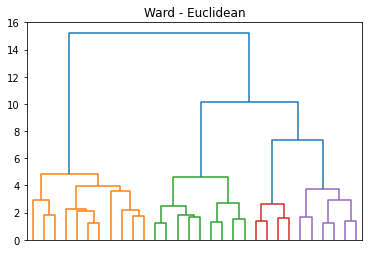

In [21]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
threshold_value = 6.0
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Ward - Euclidean")

In [22]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 4
[1510, 1416, 877, 530]


In [23]:
score = silhouette_score(X, clusters)
methods_silhouette["ward"] = round(score, 2)
score

0.28443189714992223

In [24]:
# ----------------------------------------------

In [25]:
methods_silhouette

{'complete': 0.4, 'single': 0.8, 'average': 0.75, 'ward': 0.28}